<h1 style="text-align:center;background-color:rgb(0, 0, 102); color:rgb(255, 255, 255)"> <br>
    <div style="text-align:center; color:rgb(255, 255, 255);">Lead Score Case Study </div>
    <div style="text-align:center; color:rgb(255, 255, 255);">--------------------------------------------------------------------------------------------------------------</div> <br>
    <div style="text-align:left;"> <small style="color:rgb(255, 255, 255);"><strong>Group Members:</strong><br>
                                             Chinmaya Prasad B D <br>
                                             C Hemanth Gopal <br>
                                             Kajal Vidhate <br>
                                    </small>
    </div>
</h1>


<h2 style="color:rgb(102, 51, 0)">Problem Statement - X Education Company</h2>

An education company named **`X Education`** sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 


Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

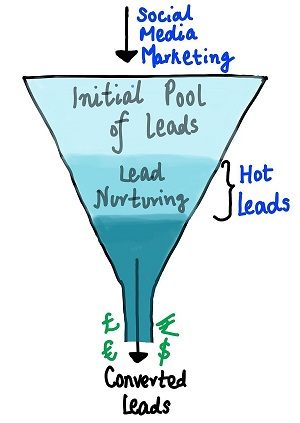
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

 

<p style="color: rgb(102, 51, 0); font-size: 15px;"><strong>Data</strong></p>

You have been provided with a leads dataset from the past with around 9000 data points. This dataset consists of various attributes such as Lead Source, Total Time Spent on Website, Total Visits, Last Activity, etc. which may or may not be useful in ultimately deciding whether a lead will be converted or not. The target variable, in this case, is the column ‘Converted’ which tells whether a past lead was converted or not wherein 1 means it was converted and 0 means it wasn’t converted. You can learn more about the dataset from the data dictionary provided in the zip folder at the end of the page. Another thing that you also need to check out are the levels present in the categorical variables. Many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value (think why?).

<u style="color:rgb(102, 51, 0); font-size: 18px;"><strong>Goals of the Case Study</strong></u>

- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

<h1 style="text-align:left; color:rgb(102, 0, 204); font-size: 25px;"> Importing necessary Libraries/Modules
</h1>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# modules for model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
pd.set_option('display.max_columns', None)


<h1 style="text-align:left;color:rgb(179, 107, 0);font-size: 20px;">
Importing Data</h1>

In [5]:
dfleads = pd.read_csv('Leads.csv')

In [6]:
# Check few records from the dataset imported
dfleads.head()


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
# Check quick info about the dataset for null values and data type of fields
dfleads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
# Using describe method on dataframe to generate descriptive statistics that summarize the central tendency,
# dispersion, and shape of a dataset's distribution.
dfleads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Checking missing values rate / percentage

In [9]:
missing_rate = round(dfleads.isnull().sum() / len(dfleads) * 100,2)
missing_rate

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

From the above summary of missing value rate in each column, we have to carry out below actions based on observations:

- Encode categorical variables
- Dealing with Missing Values
- Replace 'Select' Values as null/NaN
- Drop columns exceeds 40% null values

<h1 style="text-align:left;color:Green;font-size: 22px;">
Data Preparation</h1>

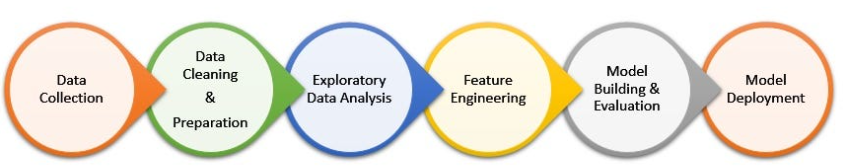

In [10]:
dfleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


**There are many columns having Yes & No as values. By converting them to 0 & 1, we can utilize for feature expansion. 
Lets Convert all the Yes/No fields to binary numbers (i.e., 1/0 respectively)**

In [11]:
# Encoding varianbles with Yes/No Labels:

# list of Yes/No fields(Columns)
yncols = ['Do Not Email', 'Do Not Call', 'Search', 'Magazine', 'Newspaper Article','X Education Forums','Newspaper',
           'Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses',
           'Update me on Supply Chain Content', 'Get updates on DM Content',
           'I agree to pay the amount through cheque', 'A free copy of Mastering The Interview']

In [12]:
for yn in yncols:
    dfleads[yn] = dfleads[yn].apply(lambda x : 1 if x=='Yes' else 0)

dfleads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Interested in other courses,Low in Relevance,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,NaN,0,0,Select,Select,02.Medium,02.Medium,15.0,15.0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Ringing,Not Sure,0,0,Select,Mumbai,02.Medium,01.High,13.0,17.0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,0,0,0,0,0,0,0,0,Will revert after reading the email,Might be,0,0,Select,Mumbai,02.Medium,01.High,15.0,18.0,0,0,Modified


### Convert 'Select' Values to null values

- These 'Select' Values are basically the field left unfilled by the user or lead while filling the form.
- May be the field is irrelavant to user/lead or not interested to select.

**So, 'Select' are as good as Null values we can replace them with Null values**

In [13]:
# Replacing all cells having 'Select' to null value
dfleads = dfleads.replace('Select', np.nan)


# storing null value info after replacing 'Select' to null values
null_after_replace_select = round((dfleads.isnull().sum() / len(dfleads)) * 100, 2)

# Null rate in data frame after replacing 'Select' to null values which exceeds 0%
null_after_replace_select=null_after_replace_select[null_after_replace_select > 0]

# Sort the columns having nulls from High to Low
null_after_replace_select.sort_values(ascending=False, inplace=True)

In [14]:
# Print value counts in sorted order of null rate columns (including null count)
for col in null_after_replace_select.index.tolist():
    print((dfleads[col].value_counts(dropna=False, normalize=True) * 100).round(2))
    print('_'*50)

How did you hear about X Education
NaN                      78.46
Online Search             8.74
Word Of Mouth             3.77
Student of SomeSchool     3.35
Other                     2.01
Multiple Sources          1.65
Advertisements            0.76
Social Media              0.73
Email                     0.28
SMS                       0.25
Name: proportion, dtype: float64
__________________________________________________
Lead Profile
NaN                            74.19
Potential Lead                 17.46
Other Leads                     5.27
Student of SomeSchool           2.61
Lateral Student                 0.26
Dual Specialization Student     0.22
Name: proportion, dtype: float64
__________________________________________________
Lead Quality
NaN                  51.59
Might be             16.88
Not Sure             11.82
High in Relevance     6.89
Worst                 6.50
Low in Relevance      6.31
Name: proportion, dtype: float64
____________________________________________

In [15]:
dfleads.isnull().sum() / len(dfleads) * 100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   36.580087
How did you hear about X Education               78.463203
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

#### Drop columns with higher null values rate (i.e.,40%)

In [16]:
# Dopping most of the columns having nulls above 40% and retiained 

    # we are dropping 'Country' columns even though its less than 40% null. Because, it is biased to One value - 'India'

dfleads.drop(['Country', 'Lead Profile', 'Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index',
              'Asymmetrique Activity Score', 'Asymmetrique Profile Score', 'How did you hear about X Education'], axis=1, inplace=True)

**Now we can move towards looking for opportunity to impute the values in rest of the columns having null values**

In [17]:
# Specialisation seems to be significant variable column and will make sense to retain it instead of dropping due to high null rate.
# Usually Specialization field should provide 'Others' as a dropdown option for those who do not see them in form dropdown.
# Since we do not see any Specialization as 'Others', we can label the Null values as 'Others'
dfleads.Specialization = dfleads.Specialization.replace(np.nan, 'Other')

In [18]:
# City columns has 15% of Null values, we can impute it with most selected city name (i.e., Mumbai)

dfleads.City = dfleads.City.replace(np.nan, 'Mumbai')


In [19]:
# Tags: Tags column has 23% of data as 'Will revert after reading the email', so lets impute this with same.

dfleads.Tags = dfleads.Tags.replace(np.nan, 'Will revert after reading the email')

In [20]:
# What is your current occupation: imputing with most occuring value 'Unemployed'

dfleads['What is your current occupation'] = dfleads['What is your current occupation'].replace(np.nan, dfleads['What is your current occupation'].mode()[0])

In [21]:
# What matters most to you in choosing a course: has 29% null values. Most reccurrent is 'Better Career Prospects'. We can 
# impute with this.
dfleads['What matters most to you in choosing a course'] = dfleads['What matters most to you in choosing a course'].replace(np.nan, dfleads['What matters most to you in choosing a course'].mode()[0])

In [22]:
# List of column name having very less null rate (i.e., <2%)
null_rate_col_less_2p = (dfleads.isnull().sum() / len(dfleads) * 100)
null_rate_col_less_2p = null_rate_col_less_2p[null_rate_col_less_2p>0]
nrcl2p = null_rate_col_less_2p.index.tolist()

# Now let us replace last few columns having less than 2% null values with mode / repeated values.
for impute in nrcl2p:
    dfleads[impute] = dfleads[impute].replace(np.nan, dfleads[impute].mode()[0])

## $Time to Explore the Data$

### Exploratory Data Analysis

Starting with the target variable : Converted

In [23]:
# Target variable - 'Converted'
# Check the imbalance in the variable

dfleads.Converted.value_counts(normalize=True) * 100

Converted
0    61.461039
1    38.538961
Name: proportion, dtype: float64

This shows the balanced classes of data. We can move forward with further exploration

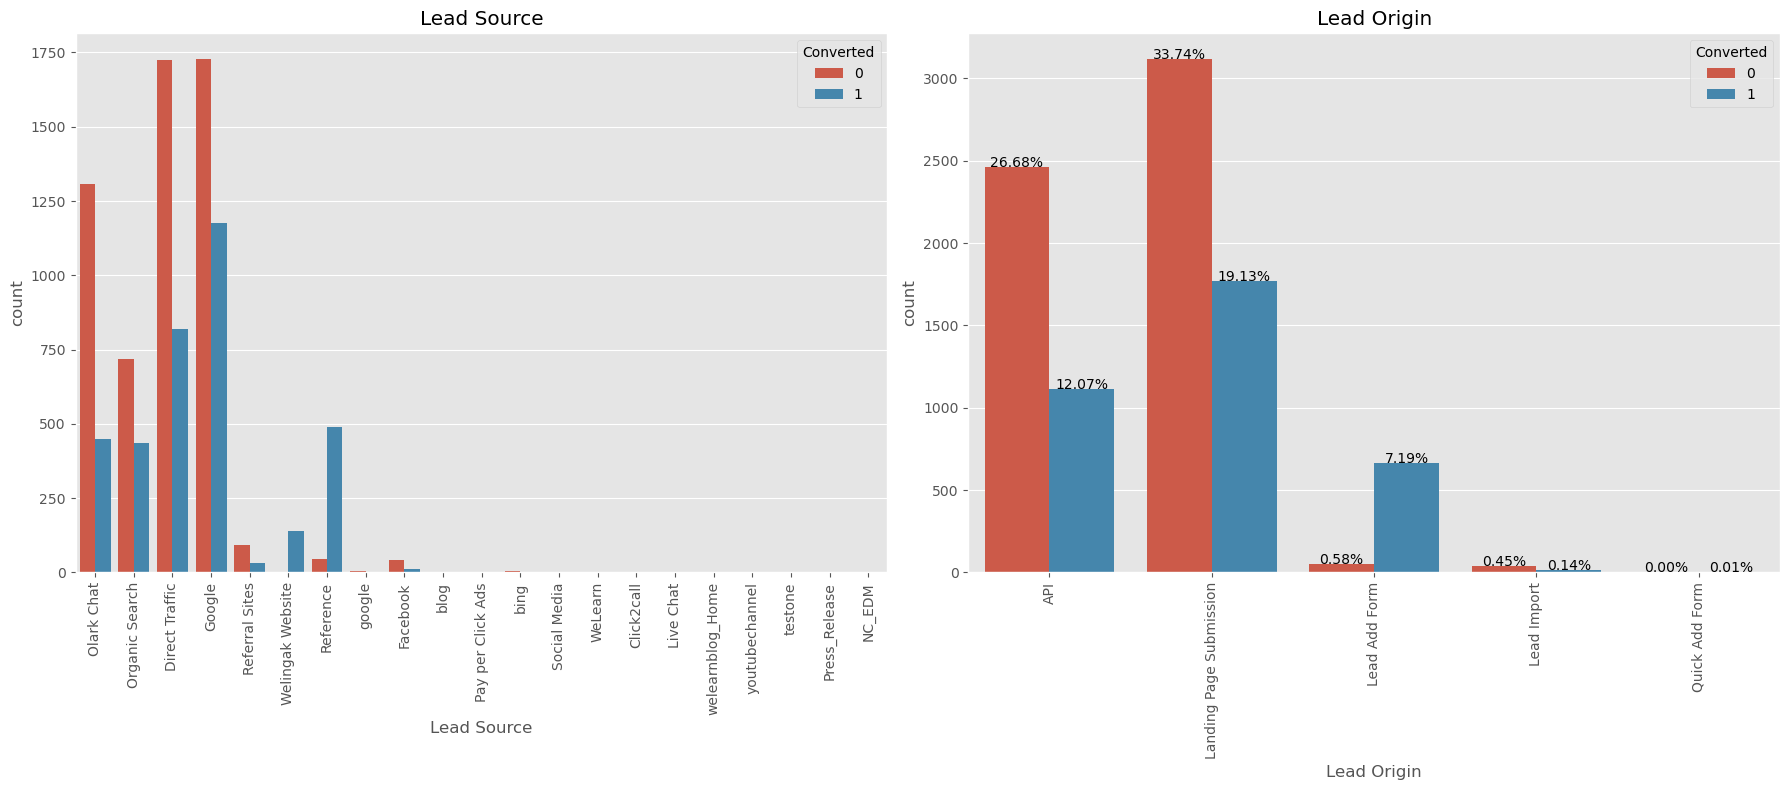

In [24]:

# Create the subplot layout with two columns
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 8))

# Loop over the columns
for i, n in enumerate(['Lead Source', 'Lead Origin']):
    ax = axes[i]  # Select the current axis

    # Draw the countplot
    sns.countplot(data=dfleads, x=n, hue='Converted', ax=ax)

    # Add data labels with percentages for the second chart only
    if i == 1:
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2., height + 0.05, f'{height / len(dfleads) * 100:.2f}%', ha='center')

    # Rotate the x-axis labels by 90 degrees
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

    # Set subplot title
    ax.set_title(n)

# Ensure proper layout and display the plot
plt.tight_layout()
plt.show()


**Observation :**

- API and Landing Page Submission has lesser conversion (approx 35%). However, the origin has significant leads count.
- Lead Import and Quick Add Form has negligeable leads and also very less conversion rate. Hence, can be ignored
- Lead Add Form seems to have good conversion rate even though having lesser lead count.

**To improve the lead conversion rate, we need to focus on increasing the conversion rate of 'API' and Landing Page Submission then also increasing the number of leads from 'Lead Add Form'**

In [25]:
# We can observe the count of leads from multiple sources are close to negligible and hence we can club them 
# into 'Others' source for better visualization and analysis

dfleads['Lead Source'] = dfleads['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media', 
                                                         'Click2call', 'Live Chat', 'WeLearn', 'Click2call', 'welearnblog_Home',
                                                        'youtubechannel', 'testone', 'Press_Release', 'NC_EDM'], 'Other Lead Sources')

dfleads['Lead Source'] = dfleads['Lead Source'].replace('google', 'Google')

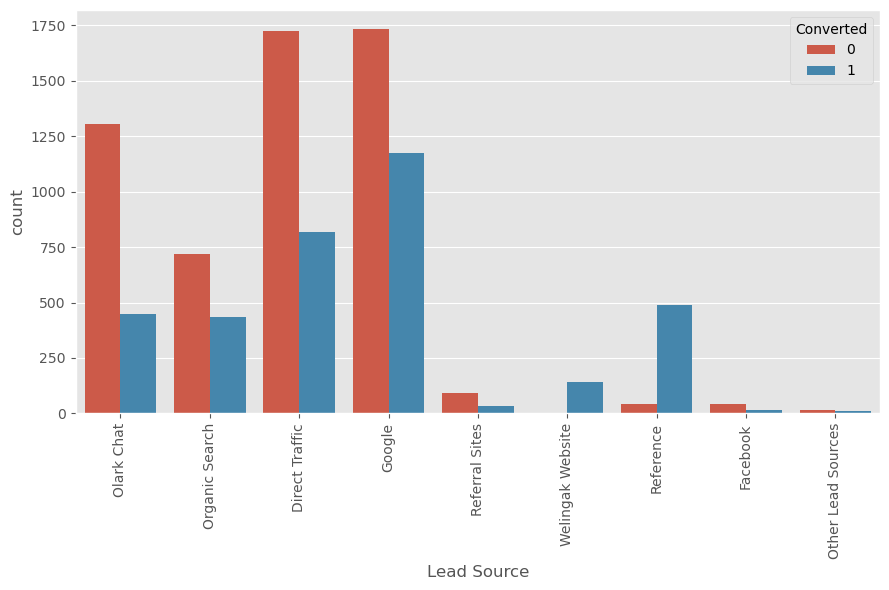

In [26]:
# Plotting clean and grouped Lead Source again:

# Create the countplot for the Lead Source
plt.figure(figsize=(9, 6))  # Adjust the figure size as needed
sns.countplot(data=dfleads, x='Lead Source', hue='Converted')

# Calculate total count for each category
total_counts = dfleads['Lead Source'].value_counts()


# Rotate the x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


**Observations** :

- Google, Direct Traffic and Olark Chat are the top 3 Lead Source
- The converstion rate for Welignak Website and Reference are higher
- Organic Search and Google has balanced Conversion rate

**So, to improve the lead conversion rate, we should focus on increasing the conversion rate of 'Google', 'Olark Chat', 'Organic Search', 'Direct Traffic' and also increasing the number of leads from 'Reference' and 'Welingnak Website'**

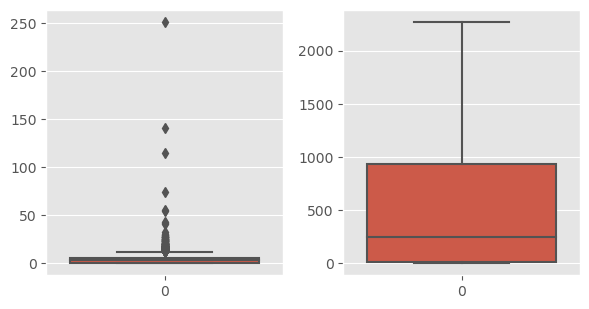

In [27]:
fig=plt.subplots(figsize=(6, 6))

for i, f in enumerate(['TotalVisits', 'Total Time Spent on Website']):
    plt.subplot(2, 2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(dfleads[f])
    

plt.tight_layout()
plt.show()

In [28]:
# A lot of out outliers in the Total Visits columns and we can cap this variable to 95 percentile

q1 = dfleads['TotalVisits'].quantile(0.95)
dfleads['TotalVisits'] = dfleads['TotalVisits'].clip(upper=q1)

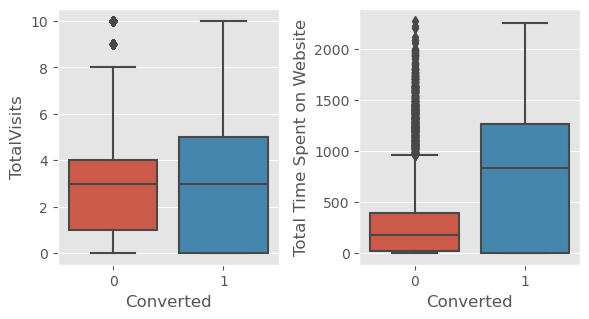

In [29]:
fig = plt.subplots(figsize=(6, 6))

for i, f in enumerate(['TotalVisits', 'Total Time Spent on Website']):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.boxplot(y=f, x='Converted', data= dfleads)
    
# # Set title for all subplots
# for ax in axes:
#     ax.set_title('Converted')

plt.tight_layout()
plt.show()

**Key Observations** :
- Users spending more time on website are more likely to get converted
- Total Visits variables are not much conclusive as the median is that similar scale

**Website pages can be made more dynamic and higher user experience so as to capture the time of the users on Websites for longer.**

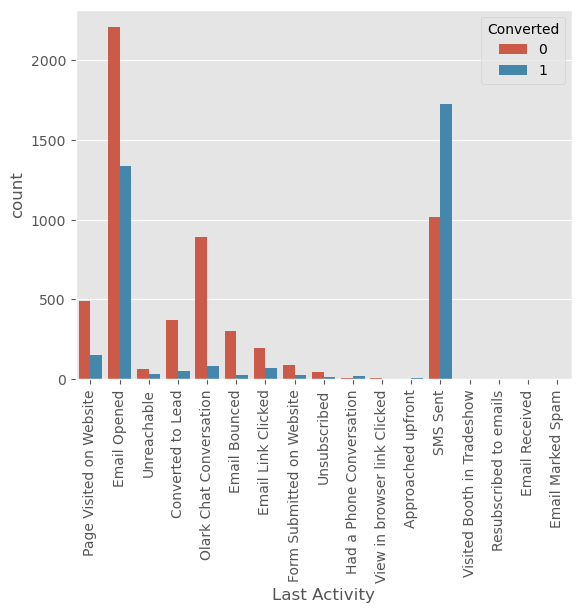

In [30]:
# Plotting the Last Activity

sns.countplot(x='Last Activity', hue='Converted', data=dfleads)
plt.xticks(rotation='vertical')
plt.show()

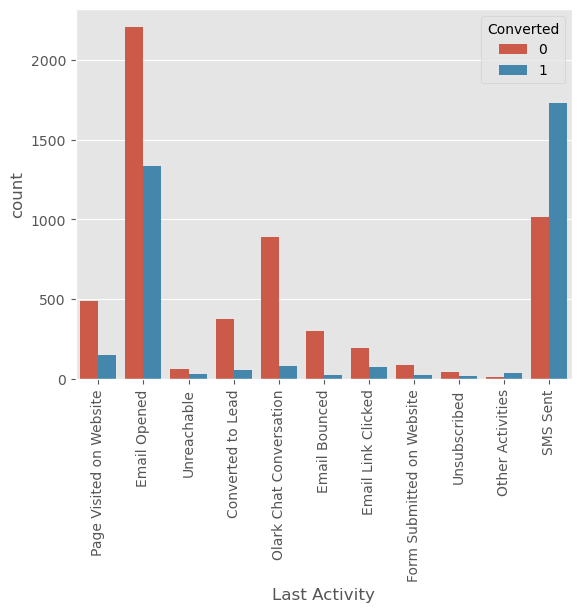

In [31]:
# Converting all the least categories to the 'Other' category

dfleads['Last Activity'] = dfleads['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked',
                                                             'Approached upfront', 'Visited Booth in Tradeshow', 
                                                             'Resubscribed to emails', 'Email Received', 
                                                             'Email Marked Spam'], 'Other Activities')

# Plot the new set again
sns.countplot(x='Last Activity', hue='Converted', data=dfleads)
plt.xticks(rotation='vertical')
plt.show()

**Key Observations** :

- "Email Opened" is the highest count of last activity
- 'SMS Sent' has higher conversion rate

**We should concentrate on increasing the conversion rate of those having last activity as Email Opened by making a call to those leads and also try to increase the count of the ones having last activity as SMS sent.**

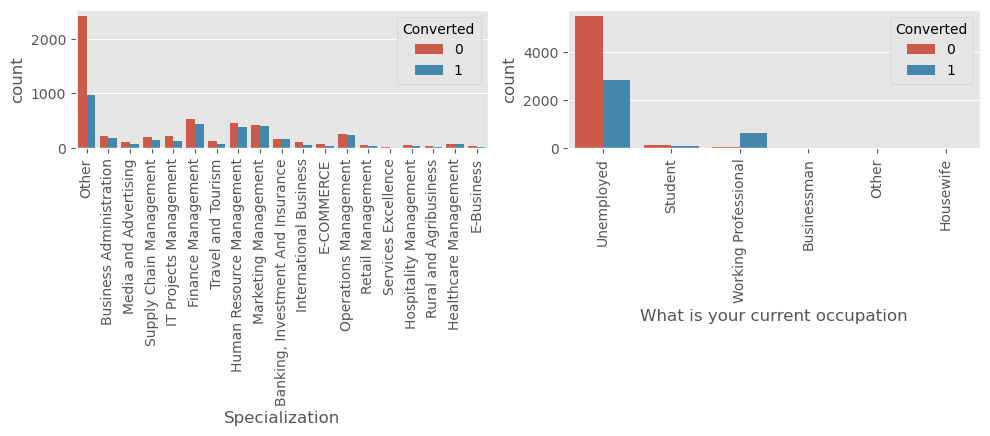

In [32]:
fig = plt.subplots(figsize=(10, 6))

for i, f in enumerate(['Specialization', 'What is your current occupation']):
    plt.subplot(2,2, i+1)
    plt.subplots_adjust(hspace = 2.0)
    sns.countplot(x=f, hue='Converted', data=dfleads)
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Key Observations** :
- Specialization is spread among all categories and no specific inferences can be made here.
- In Occupation, Working Professionals has higher conversion rate.
- Unemployed leads dominate the variable.

**To improvise the converstion rate, we should increase the Working Professional leads. Newer strategies to be thought to reachout to Working Professionals.**

In [33]:
dfleads.describe()

,Lead Number,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000,9240.0,9240.0,9240.0,9240.0,9240.000000
mean,617188.435606,0.079437,0.000216,0.385390,3.134740,487.698268,2.327787,0.001515,0.0,0.000216,0.000108,0.000108,0.000433,0.000758,0.0,0.0,0.0,0.0,0.312554
std,23405.995698,0.270435,0.014711,0.486714,2.787787,548.021466,2.164258,0.038898,0.0,0.014711,0.010403,0.010403,0.020803,0.027515,0.0,0.0,0.0,0.0,0.463559
min,579533.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
25%,596484.500000,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
50%,615479.000000,0.000000,0.000000,0.000000,3.000000,248.000000,2.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
75%,637387.250000,0.000000,0.000000,1.000000,5.000000,936.000000,3.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.000000
max,660737.000000,1.000000,1.000000,1.000000,10.000000,2272.000000,55.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,1.000000


**Key Observations** :
- We can clearly see that most columns has values as 0 i.e., 'No' and hence no inference can be made using these columnsm

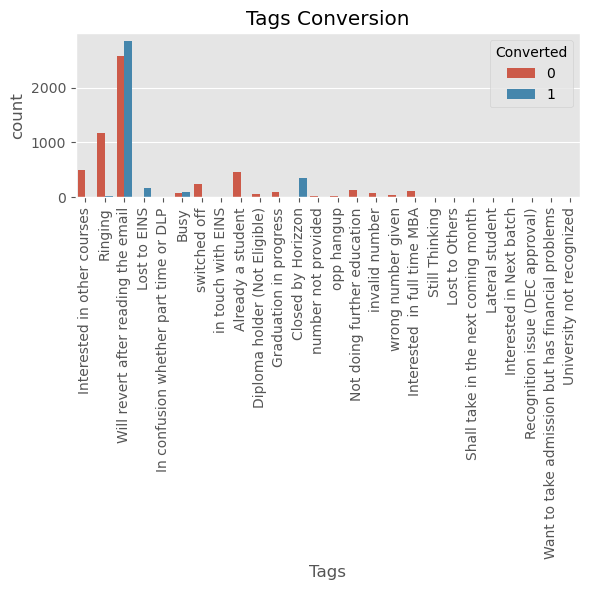

In [34]:
fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Tags', hue='Converted', data=dfleads, ax=ax)
plt.title('Tags Conversion')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()

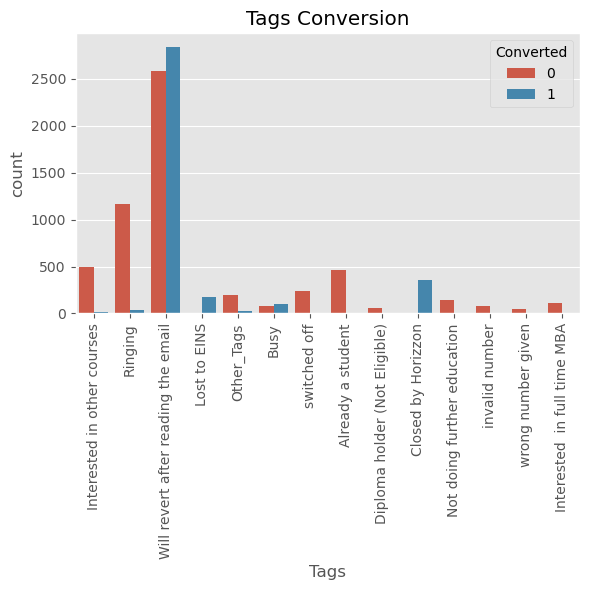

In [35]:
# Group all of the least categories into 'Other Tags'

dfleads['Tags'] = dfleads['Tags'].replace(['Still Thinking', 'Lost to Others', 'Shall take in the next coming month',
                                           'Lateral student', 'Interested in Next batch', 'Recognition issue (DEC approval)',
                                           'Want to take admission but has financial problems', 'University not recognized',
                                           'In confusion whether part time or DLP', 'in touch with EINS', 'opp hangup',
                                           'number not provided', 'Graduation in progress', 'Lateral student', 'Approached upfront'],'Other_Tags')

# Plotting visual after grouping

fig, ax = plt.subplots(figsize=(6, 6))

sns.countplot(x='Tags', hue='Converted', data=dfleads, ax=ax)
plt.title('Tags Conversion')
plt.xticks(rotation=90)  # Rotate x-axis labels if needed

plt.tight_layout()
plt.show()

**Key Observations** :
- Tags like 'Will revert after reading the email', 'Closed by Horizzon' and 'Lost to EINS' has higher conversion rates.


#### Dropping unnecessary columns from dataframe

In [36]:
dfleads.drop(['Lead Number', 'What matters most to you in choosing a course', 'Newspaper Article', 'X Education Forums',
              'Newspaper', 'Magazine', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
              'A free copy of Mastering The Interview', 'Do Not Call'], axis=1, inplace=True)

dfleads.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Search,Tags,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,0,Interested in other courses,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Other,Unemployed,0,Ringing,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,0,Will revert after reading the email,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,0,Ringing,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Other,Unemployed,0,Will revert after reading the email,Mumbai,Modified


In [37]:
ldummies = pd.get_dummies(dfleads[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                    'What is your current occupation', 'Tags', 'City', 'Last Notable Activity']],
                           drop_first=True).astype(int)

ldummies.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [38]:
dfleads = dfleads.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
                                    'What is your current occupation', 'Tags', 'City', 'Last Notable Activity'], axis=1)

dfleads.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0


In [39]:
dfleads = pd.concat([dfleads, ldummies], axis=1)
dfleads.head()

,Prospect ID,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,1,2.0,1532,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Test-Train Split

In [40]:
# setting feature variable to X
X = dfleads.drop(['Prospect ID', 'Converted'], axis=1)
# setting response variable to y
y = dfleads['Converted']

print(y)

X.head()

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [41]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)



## Feature Scaling using Standard Scaler

In [42]:
scaler = StandardScaler()

X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other Lead Sources,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Diploma holder (Not Eligible),Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Other_Tags,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,-1.121955,-0.885371,-1.062143,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0.313260,0.005716,-0.452487,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0.672063,-0.691418,0.083827,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0.672063,1.365219,1.229797,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,-1.121955,-0.885371,-1.062143,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [43]:
## find converstion rate before:

print('Converstion rate = ',round(sum(dfleads['Converted'])/len(dfleads)*100,2),'%')

Converstion rate =  38.54 %


### Finding Correlations

In [44]:
df_leadx = dfleads.drop(['Prospect ID'],axis = 1)

In [45]:
# Find correlation between different numerical variables for both Converted and non-converted cases

# Calculate the correlation matrix
corr_matrix = df_leadx.corr()

# Filter out the upper triangular part of the correlation matrix to avoid duplicate pairs
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find the top correlation pairs
top_corr_pairs = upper_tri.stack().sort_values(ascending=False).head(10)

print(top_corr_pairs)

Lead Origin_Lead Import                Lead Source_Facebook                             0.981709
Last Activity_Unsubscribed             Last Notable Activity_Unsubscribed               0.877108
Lead Origin_Lead Add Form              Lead Source_Reference                            0.853237
Last Activity_SMS Sent                 Last Notable Activity_SMS Sent                   0.852707
Last Activity_Email Opened             Last Notable Activity_Email Opened               0.842496
Last Activity_Email Link Clicked       Last Notable Activity_Email Link Clicked         0.800764
TotalVisits                            Page Views Per Visit                             0.743740
Last Activity_Page Visited on Website  Last Notable Activity_Page Visited on Website    0.692057
Do Not Email                           Last Activity_Email Bounced                      0.618470
Last Activity_Unreachable              Last Notable Activity_Unreachable                0.584642
dtype: float64


In [46]:
# Drop highly correlated feature

X_test = X_test.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Unreachable',
                     'Last Notable Activity_Page Visited on Website'], axis = 1)

X_train = X_train.drop(['Lead Source_Facebook','Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent',
                      'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Link Clicked', 'Last Notable Activity_Unreachable',
                     'Last Notable Activity_Page Visited on Website'], axis = 1)

In [47]:
corr_conv = X_train.corr()

In [48]:
corr_conv.where(np.triu(np.ones(corr_conv.shape), k=1).astype(bool)).stack().sort_values(ascending=False).head(10)

Lead Origin_Lead Add Form              Lead Source_Reference                             0.862134
TotalVisits                            Page Views Per Visit                              0.732510
Do Not Email                           Last Activity_Email Bounced                       0.631980
Last Activity_Other Activities         Last Notable Activity_Had a Phone Conversation    0.536902
Lead Source_Olark Chat                 Specialization_Other                              0.498444
Page Views Per Visit                   Lead Origin_Landing Page Submission               0.492858
TotalVisits                            Lead Origin_Landing Page Submission               0.467763
Lead Source_Olark Chat                 Last Activity_Olark Chat Conversation             0.430903
Last Activity_Olark Chat Conversation  Last Notable Activity_Olark Chat Conversation     0.407519
Lead Origin_Lead Add Form              Lead Source_Welingak Website                      0.406570
dtype: float64

## Model Building

In [49]:
# Logistic regression model

logm = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6392
Model Family:                Binomial   Df Model:                           75
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1657.6
Date:                Tue, 20 Feb 2024   Deviance:                       3315.3
Time:                        21:32:34   Pearson chi2:                 1.62e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5582
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -4.7165      1.828     -2.580      0.010      -8.299      -1.134
Do Not Email                                            -1.0769      0.265     -4.068      0.000      -1.596      -0.558
TotalVisits                                              0.1621      0.074      2.184      0.029       0.017       0.308
Total Time Spent on Website                              1.1221      0.054     20.746      0.000       1.016       1.228
Page Views Per Visit                                    -0.1124      0.076     -1.474      0.141      -0.262       0.037
Search                                                   0.2156      1.220      0.177      0.860      -2.176       2.607
Lead Origin_Landing Page Submission                     -1.1970      0.181     -6.618      0.000      -1.552      -0.843
Lead Origin_Lead Add Form                                2.8621      0.657      4.357      0.000       1.575       4.150
Lead Origin_Lead Import                                  0.0765      0.614      0.125      0.901      -1.128       1.281
Lead Origin_Quick Add Form                              23.0774   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.2160      0.129      1.674      0.094      -0.037       0.469
Lead Source_Olark Chat                                   0.8965      0.200      4.474      0.000       0.504       1.289
Lead Source_Organic Search                               0.2026      0.173      1.172      0.241      -0.136       0.541
Lead Source_Other Lead Sources                           0.2385      0.724      0.329      0.742      -1.181       1.658
Lead Source_Reference                                   -0.0225      0.710     -0.032      0.975      -1.414       1.369
Lead Source_Referral Sites                               0.2047      0.370      0.553      0.580      -0.521       0.930
Lead Source_Welingak Website                             2.0809      0.986      2.110      0.035       0.148       4.013
Last Activity_Email Bounced                             -0.8361      0.604     -1.384      0.166      -2.020       0.348
Last Activity_Email Link Clicked                        -0.6845      0.414     -1.654      0.098      -1.495       0.127
Last Activity_Email Opened                              -0.1697      0.309     -0.550      0.582      -0.775       0.435
Last Activity_Form Submitted on Website                  0.1085      0.524      0.207      0.836      -0.919       1.136
Last Activity_Olark Chat Conversation                   -0.3808      0.352     -1.083      0.279      -1.070       0.308
Last Activity_Other Activities                           0

### Feature Selection Using RFE

In [50]:
# Lets start with 15 features selection by RFE
# Later we can optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))


[('Do Not Email', False, 4),
 ('TotalVisits', False, 41),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 42),
 ('Search', False, 51),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 61),
 ('Lead Origin_Quick Add Form', False, 39),
 ('Lead Source_Google', False, 35),
 ('Lead Source_Olark Chat', False, 16),
 ('Lead Source_Organic Search', False, 34),
 ('Lead Source_Other Lead Sources', False, 38),
 ('Lead Source_Reference', False, 33),
 ('Lead Source_Referral Sites', False, 36),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', False, 24),
 ('Last Activity_Email Link Clicked', False, 21),
 ('Last Activity_Email Opened', False, 37),
 ('Last Activity_Form Submitted on Website', False, 55),
 ('Last Activity_Olark Chat Conversation', False, 26),
 ('Last Activity_Other Activities', True, 1),
 ('Last Activity_Page Visited on Website', False, 22),
 ('Last Acti

In [51]:
col_rfe = X_train.columns[rfe.support_]


#### Assessing the model with StatsModel

In [52]:
X_train_sm = sm.add_constant(X_train[col_rfe])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1987.8
Date:                Tue, 20 Feb 2024   Deviance:                       3975.7
Time:                        21:32:39   Pearson chi2:                 1.59e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.5107
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4915      0.380     -3.923      0.000      -2.237      -0.746
Lead Origin_Landing Page Submission                     -1.3820      0.148     -9.319      0.000      -1.673      -1.091
Lead Origin_Lead Add Form                                1.7052      0.263      6.474      0.000       1.189       2.221
Lead Source_Welingak Website                             2.2769      0.786      2.895      0.004       0.735       3.818
Last Activity_Other Activities                           2.0592      0.573      3.595      0.000       0.936       3.182
Last Activity_SMS Sent                                   1.9058      0.090     21.228      0.000       1.730       2.082
Specialization_Other                                    -1.7972      0.150    -11.984      0.000      -2.091      -1.503
What is your current occupation_Unemployed              -1.6692      0.339     -4.921      0.000      -2.334      -1.004
What is your current occupation_Working Professional     1.2140      0.416      2.915      0.004       0.398       2.030
Tags_Busy                                                3.7499      0.260     14.440      0.000       3.241       4.259
Tags_Closed by Horizzon                                 10.2674      1.025     10.021      0.000       8.259      12.276
Tags_Lost to EINS                                        9.5525      0.743     12.849      0.000       8.095      11.010
Tags_Other_Tags                                          2.4501      0.316      7.750      0.000       1.830       3.070
Tags_Will revert after reading the email                 4.3398      0.169     25.730      0.000       4.009       4.670
Last Notable Activity_Modified                          -1.7230      0.093    -18.586      0.000      -1.905      -1.541
Last Notable Activity_Olark Chat Conversation           -1.5284      0.332     -4.602      0.000      -2.179      -0.877
========================================================================================================================
"""

In [53]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]


1871    0.040674
6795    0.119201
3516    0.006979
8105    0.066809
3934    0.087782
4844    0.989911
3297    0.010534
8071    0.999994
987     0.087782
7423    0.783766
dtype: float64

In [54]:
y_train_pred_final = y_train_pred.values.reshape(-1)
y_train_pred_final


array([0.04067385, 0.11920058, 0.0069791 , ..., 0.35022068, 0.02155272,
       0.08778203])

In [55]:
y_train_pred_final = pd.DataFrame({'Convert': y_train.values, 'Convert_Prob': y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()


,Convert,Convert_Prob,Pros_ID
1871,0,0.040674,1871
6795,0,0.119201,6795
3516,0,0.006979,3516
8105,0,0.066809,8105
3934,0,0.087782,3934


In [56]:
# Lets create new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()


,Convert,Convert_Prob,Pros_ID,predicted
1871,0,0.040674,1871,0
6795,0,0.119201,6795,0
3516,0,0.006979,3516,0
8105,0,0.066809,8105,0
3934,0,0.087782,3934,0


In [57]:
print('Accuracy score', metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))


Accuracy score 0.8712121212121212


In [58]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by='Variance Inflation Factor', ascending=False)
    print(vif_df)

vif_results = calculate_vif(X_train[col_rfe])


                                             Features  \
6          What is your current occupation_Unemployed   
0                 Lead Origin_Landing Page Submission   
5                                Specialization_Other   
12           Tags_Will revert after reading the email   
1                           Lead Origin_Lead Add Form   
7   What is your current occupation_Working Profes...   
13                     Last Notable Activity_Modified   
4                              Last Activity_SMS Sent   
9                             Tags_Closed by Horizzon   
2                        Lead Source_Welingak Website   
8                                           Tags_Busy   
11                                    Tags_Other_Tags   
14      Last Notable Activity_Olark Chat Conversation   
10                                  Tags_Lost to EINS   
3                      Last Activity_Other Activities   

    Variance Inflation Factor  
6                       10.36  
0                      

**---------------------------------------------------------------------------------------Model rebuild 2-----------------------------------------------------------------------------------------------**

### Rebuild model by removing high VIF features

In [59]:
X_train = X_train.drop(['What is your current occupation_Unemployed', 'Lead Origin_Landing Page Submission'],axis=1)

X_test = X_test.drop(['What is your current occupation_Unemployed', 'Lead Origin_Landing Page Submission'],axis=1)

In [60]:
# Logistic regression model

logm = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logm.fit().summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6394
Model Family:                Binomial   Df Model:                           73
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1680.5
Date:                Tue, 20 Feb 2024   Deviance:                       3360.9
Time:                        21:32:40   Pearson chi2:                 1.51e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5550
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -5.1623      0.845     -6.106      0.000      -6.819      -3.505
Do Not Email                                            -1.1340      0.262     -4.333      0.000      -1.647      -0.621
TotalVisits                                              0.1663      0.074      2.247      0.025       0.021       0.311
Total Time Spent on Website                              1.1479      0.054     21.290      0.000       1.042       1.254
Page Views Per Visit                                    -0.1692      0.077     -2.197      0.028      -0.320      -0.018
Search                                                  -0.0940      1.206     -0.078      0.938      -2.457       2.269
Lead Origin_Lead Add Form                                3.2347      0.656      4.929      0.000       1.948       4.521
Lead Origin_Lead Import                                  0.6793      0.600      1.133      0.257      -0.496       1.855
Lead Origin_Quick Add Form                              24.0976   1.31e+05      0.000      1.000   -2.57e+05    2.57e+05
Lead Source_Google                                       0.4540      0.124      3.662      0.000       0.211       0.697
Lead Source_Olark Chat                                   1.4115      0.185      7.625      0.000       1.049       1.774
Lead Source_Organic Search                               0.4650      0.168      2.769      0.006       0.136       0.794
Lead Source_Other Lead Sources                           0.4741      0.745      0.637      0.524      -0.985       1.934
Lead Source_Reference                                    0.4440      0.706      0.629      0.529      -0.939       1.827
Lead Source_Referral Sites                               0.6574      0.365      1.802      0.072      -0.058       1.372
Lead Source_Welingak Website                             2.1734      0.986      2.204      0.028       0.241       4.106
Last Activity_Email Bounced                             -0.9109      0.603     -1.512      0.131      -2.092       0.270
Last Activity_Email Link Clicked                        -0.6855      0.413     -1.661      0.097      -1.495       0.124
Last Activity_Email Opened                              -0.1431      0.309     -0.463      0.644      -0.749       0.463
Last Activity_Form Submitted on Website                  0.2345      0.512      0.458      0.647      -0.769       1.238
Last Activity_Olark Chat Conversation                   -0.3092      0.349     -0.885      0.376      -0.994       0.376
Last Activity_Other Activities                           0.6893      0.862      0.800      0.424      -1.000       2.379
Last Activity_Page Visited on Website                   -0

**RFE Feature selection**

In [61]:
# Lets start with 15 features selection by RFE
# Later we can optimize the model further by inspecting VIF and p-value of the features

logreg = LogisticRegression()
rfe = RFE(estimator=logreg, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 6),
 ('Page Views Per Visit', False, 41),
 ('Search', False, 55),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 26),
 ('Lead Origin_Quick Add Form', False, 30),
 ('Lead Source_Google', False, 29),
 ('Lead Source_Olark Chat', False, 12),
 ('Lead Source_Organic Search', False, 28),
 ('Lead Source_Other Lead Sources', False, 36),
 ('Lead Source_Reference', False, 20),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Welingak Website', False, 4),
 ('Last Activity_Email Bounced', False, 23),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 44),
 ('Last Activity_Form Submitted on Website', False, 33),
 ('Last Activity_Olark Chat Conversation', False, 32),
 ('Last Activity_Other Activities', False, 7),
 ('Last Activity_Page Visited on Website', False, 24),
 ('Last Activity_SMS Sent', True, 1),
 ('Last Activity_Unreach

In [62]:
col_rfe = X_train.columns[rfe.support_]

**Again assessing the model with StatsModel**

In [63]:
# RFE selection
X_train_sm = sm.add_constant(X_train[col_rfe])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2059.2
Date:                Tue, 20 Feb 2024   Deviance:                       4118.4
Time:                        21:32:46   Pearson chi2:                 1.38e+04
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4997
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9734      0.264    -15.056      0.000      -4.491      -3.456
Do Not Email                                            -1.0731      0.178     -6.034      0.000      -1.422      -0.725
Lead Origin_Lead Add Form                                2.6409      0.221     11.976      0.000       2.209       3.073
Last Activity_SMS Sent                                   1.8611      0.088     21.073      0.000       1.688       2.034
What is your current occupation_Housewife               22.1055   1.27e+04      0.002      0.999   -2.48e+04    2.48e+04
What is your current occupation_Working Professional     3.1406      0.243     12.922      0.000       2.664       3.617
Tags_Busy                                                3.2554      0.333      9.785      0.000       2.603       3.908
Tags_Closed by Horizzon                                  9.6791      1.042      9.285      0.000       7.636      11.722
Tags_Lost to EINS                                        9.0185      0.768     11.745      0.000       7.513      10.523
Tags_Other_Tags                                          2.1581      0.374      5.771      0.000       1.425       2.891
Tags_Ringing                                            -0.7497      0.343     -2.183      0.029      -1.423      -0.077
Tags_Will revert after reading the email                 3.7859      0.264     14.338      0.000       3.268       4.303
Tags_switched off                                       -0.8876      0.576     -1.540      0.124      -2.017       0.242
Last Notable Activity_Had a Phone Conversation           2.5747      1.093      2.355      0.019       0.432       4.717
Last Notable Activity_Modified                          -1.6900      0.090    -18.731      0.000      -1.867      -1.513
Last Notable Activity_Olark Chat Conversation           -1.6846      0.320     -5.265      0.000      -2.312      -1.057
========================================================================================================================
"""

**We can drop 'What is your current occupation_Housewife' column since it has high P value and re run the GLM**

In [64]:
col_rfe = col_rfe.drop('What is your current occupation_Housewife')
col_rfe

Index(['Do Not Email', 'Lead Origin_Lead Add Form', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Other_Tags',
       'Tags_Ringing', 'Tags_Will revert after reading the email',
       'Tags_switched off', 'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [65]:
# RFE after dropping high P value column 'What is your current occupation_Housewife'
# RFE selection
X_train_sm = sm.add_constant(X_train[col_rfe])
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2063.0
Date:                Tue, 20 Feb 2024   Deviance:                       4126.0
Time:                        21:32:46   Pearson chi2:                 1.38e+04
No. Iterations:                     9   Pseudo R-squ. (CS):             0.4991
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.9720      0.264    -15.052      0.000      -4.489      -3.455
Do Not Email                                            -1.0767      0.178     -6.057      0.000      -1.425      -0.728
Lead Origin_Lead Add Form                                2.6449      0.220     12.017      0.000       2.214       3.076
Last Activity_SMS Sent                                   1.8564      0.088     21.031      0.000       1.683       2.029
What is your current occupation_Working Professional     3.1361      0.243     12.904      0.000       2.660       3.612
Tags_Busy                                                3.2565      0.333      9.790      0.000       2.605       3.908
Tags_Closed by Horizzon                                  9.6990      1.042      9.306      0.000       7.656      11.742
Tags_Lost to EINS                                        9.0153      0.768     11.741      0.000       7.510      10.520
Tags_Other_Tags                                          2.1585      0.374      5.773      0.000       1.426       2.891
Tags_Ringing                                            -0.7479      0.343     -2.178      0.029      -1.421      -0.075
Tags_Will revert after reading the email                 3.7889      0.264     14.351      0.000       3.271       4.306
Tags_switched off                                       -0.8849      0.576     -1.535      0.125      -2.014       0.245
Last Notable Activity_Had a Phone Conversation           2.5709      1.093      2.351      0.019       0.428       4.714
Last Notable Activity_Modified                          -1.6875      0.090    -18.734      0.000      -1.864      -1.511
Last Notable Activity_Olark Chat Conversation           -1.6888      0.320     -5.278      0.000      -2.316      -1.062
========================================================================================================================
"""

- P value looks good now

In [66]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.008837
6795    0.454352
3516    0.008837
8105    0.053987
3934    0.133469
4844    0.991913
3297    0.008837
8071    0.999946
987     0.133469
7423    0.842016
dtype: float64

In [67]:
y_train_pred_final = pd.DataFrame({'Convert': y_train.values, 'Convert_Prob': y_train_pred})
y_train_pred_final['Pros_ID'] = y_train.index
y_train_pred_final.head()


,Convert,Convert_Prob,Pros_ID
1871,0,0.008837,1871
6795,0,0.454352,6795
3516,0,0.008837,3516
8105,0,0.053987,8105
3934,0,0.133469,3934


In [68]:
# Lets create new column 'predicted' with 1 if Convert_Prob > 0.5 else 0

y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted
1871,0,0.008837,1871,0
6795,0,0.454352,6795,0
3516,0,0.008837,3516,0
8105,0,0.053987,8105,0
3934,0,0.133469,3934,0


**Accuracy is improved and at agreable level**

In [69]:
print('Accuracy score', metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))


Accuracy score 0.8572974644403216


**Checking VIF again**

In [70]:
def calculate_vif(X_train):
    vif_df = pd.DataFrame()
    vif_df['Features'] = X_train.columns
    vif_df['Variance Inflation Factor'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
    vif_df['Variance Inflation Factor'] = round(vif_df['Variance Inflation Factor'], 2)
    vif_df = vif_df.sort_values(by='Variance Inflation Factor', ascending=False)
    print(vif_df)

vif_results = calculate_vif(X_train[col_rfe])


                                             Features  \
9            Tags_Will revert after reading the email   
2                              Last Activity_SMS Sent   
12                     Last Notable Activity_Modified   
1                           Lead Origin_Lead Add Form   
5                             Tags_Closed by Horizzon   
3   What is your current occupation_Working Profes...   
8                                        Tags_Ringing   
0                                        Do Not Email   
4                                           Tags_Busy   
6                                   Tags_Lost to EINS   
7                                     Tags_Other_Tags   
10                                  Tags_switched off   
13      Last Notable Activity_Olark Chat Conversation   
11     Last Notable Activity_Had a Phone Conversation   

    Variance Inflation Factor  
9                        1.84  
2                        1.61  
12                       1.45  
1               

**VIF score now looks good for all the Features. We can go ahead**

# Model Evaluation

**Confusion Metrics function**

In [71]:
# Function Description: This function returns and prints confusion matrix, accuracy, sensitivity, specificity, False Positive rate, Positive Predictive Value
# function name: model_evaluator
# arguments: 2 (i.e., y_true, y_predicted)

from sklearn.metrics import confusion_matrix

def model_evaluator(y_true, y_predicted, print_score=False):
    # Calculate Confusion Matrix
    cm = confusion_matrix(y_true, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate Metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)   # This calcuation is similar to inbuild function metrics.accuracy(y_true, y_predicted)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)
    precision = tp / (tp + fp)   # Calculating Precision. This is similar to precision_score(y_true, y_predicted) from sklearn 's precision_score module
    
    # Print Confusion Matrix and Metrics
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("False Positive Rate:", false_positive_rate)
    print("Precision:", precision)
    
    return accuracy, sensitivity, specificity, precision

def model_evaluator_cm_graph(y_true, y_predicted, print_score=False):
    # Calculate Confusion Matrix
    cm = confusion_matrix(y_true, y_predicted)
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate Metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)   # This calcuation is similar to inbuild function metrics.accuracy(y_true, y_predicted)
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    false_positive_rate = fp / (fp + tn)
    precision = tp / (tp + fp)   # Calculating Precision. This is similar to precision_score(y_true, y_predicted) from sklearn 's precision_score module
    
    # Print Confusion Matrix and Metrics
    print("Confusion Matrix:")
    print(cm)
    print("Accuracy:", accuracy)
    print("Sensitivity:", sensitivity)
    print("Specificity:", specificity)
    print("False Positive Rate:", false_positive_rate)
    print("Precision:", precision)
    
    # Plot Confusion Matrix as Heatmap
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


    return accuracy, sensitivity, specificity, precision

Confusion Matrix:
[[3863  139]
 [ 784 1682]]
Accuracy: 0.8572974644403216
Sensitivity: 0.6820762368207623
Specificity: 0.9652673663168416
False Positive Rate: 0.03473263368315842
Precision: 0.9236683141131247


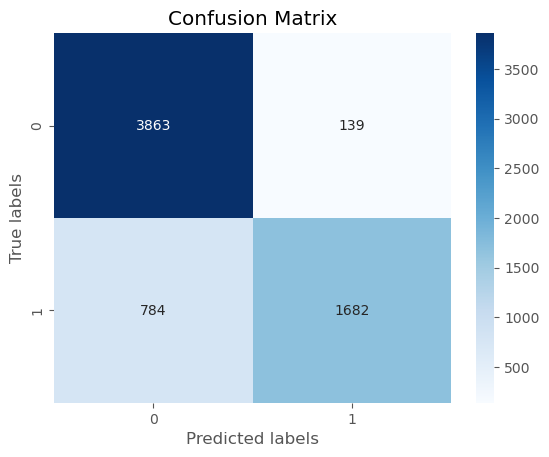

(0.8572974644403216,
 0.6820762368207623,
 0.9652673663168416,
 0.9236683141131247)

In [72]:
# Lets evaluate the model 😊

model_evaluator_cm_graph(y_train_pred_final.Convert, y_train_pred_final.predicted, print_score=True)

# Plotting the ROC Curve

**Receiver Operating Characteristic (ROC) curve**

In [73]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

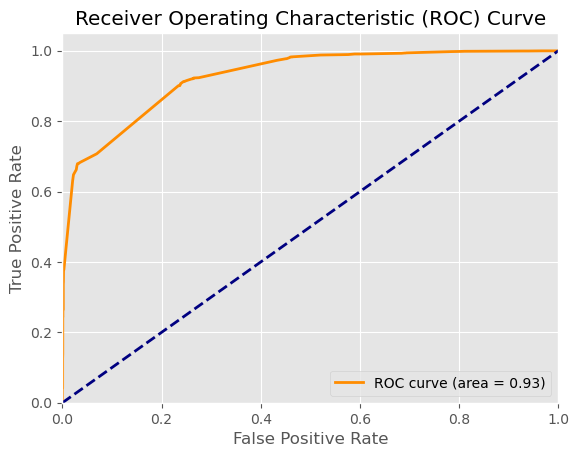

In [74]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False)

plot_roc_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

# Finding optimal value of the cut off

In [75]:
def find_optimal_cutoff(y_true, y_score):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

In [76]:
find_optimal_cutoff(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

0.32838211292917274

In [77]:
# Predicting  Convert status with different probability cutoffs

for i in [float(x)/10 for x in range(10)]:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
1871,0,0.008837,1871,0,1,0,0,0,0,0,0,0,0,0
6795,0,0.454352,6795,0,1,1,1,1,1,0,0,0,0,0
3516,0,0.008837,3516,0,1,0,0,0,0,0,0,0,0,0
8105,0,0.053987,8105,0,1,0,0,0,0,0,0,0,0,0
3934,0,0.133469,3934,0,1,1,0,0,0,0,0,0,0,0


In [78]:
# Calculating accuracy, sensitivity and specificity for various probability cutoffs from 0.1 to 0.9

df = pd.DataFrame(columns= ['probability_score', 'accuracy_score', 'sensitivity_score', 'specificity_Score', 'precision_score'])

for i in [float(x/10) for x in range(10)]:
    (accuracy, sensitivity, specificity, precision) = model_evaluator(y_train_pred_final.Convert, y_train_pred_final[i])
    df.loc[i] = [i, accuracy,sensitivity, specificity, precision]

df

Confusion Matrix:
[[   0 4002]
 [   0 2466]]
Accuracy: 0.3812615955473098
Sensitivity: 1.0
Specificity: 0.0
False Positive Rate: 1.0
Precision: 0.3812615955473098
Confusion Matrix:
[[2169 1833]
 [  48 2418]]
Accuracy: 0.7091836734693877
Sensitivity: 0.9805352798053528
Specificity: 0.5419790104947526
False Positive Rate: 0.4580209895052474
Precision: 0.5688073394495413
Confusion Matrix:
[[2953 1049]
 [ 197 2269]]
Accuracy: 0.8073593073593074
Sensitivity: 0.9201135442011354
Specificity: 0.7378810594702648
False Positive Rate: 0.2621189405297351
Precision: 0.6838456901748041
Confusion Matrix:
[[3018  984]
 [ 216 2250]]
Accuracy: 0.8144712430426716
Sensitivity: 0.9124087591240876
Specificity: 0.7541229385307346
False Positive Rate: 0.24587706146926536
Precision: 0.6957328385899815
Confusion Matrix:
[[3052  950]
 [ 240 2226]]
Accuracy: 0.816017316017316
Sensitivity: 0.902676399026764
Specificity: 0.7626186906546727
False Positive Rate: 0.23738130934532733
Precision: 0.7008816120906801
Confu

,probability_score,accuracy_score,sensitivity_score,specificity_Score,precision_score
0.0,0.0,0.381262,1.000000,0.000000,0.381262
0.1,0.1,0.709184,0.980535,0.541979,0.568807
0.2,0.2,0.807359,0.920114,0.737881,0.683846
0.3,0.3,0.814471,0.912409,0.754123,0.695733
0.4,0.4,0.816017,0.902676,0.762619,0.700882
0.5,0.5,0.857297,0.682076,0.965267,0.923668
0.6,0.6,0.858844,0.679238,0.969515,0.932109
0.7,0.7,0.853896,0.662206,0.972014,0.935817
0.8,0.8,0.847093,0.633009,0.979010,0.948936
0.9,0.9,0.760823,0.376723,0.997501,0.989350


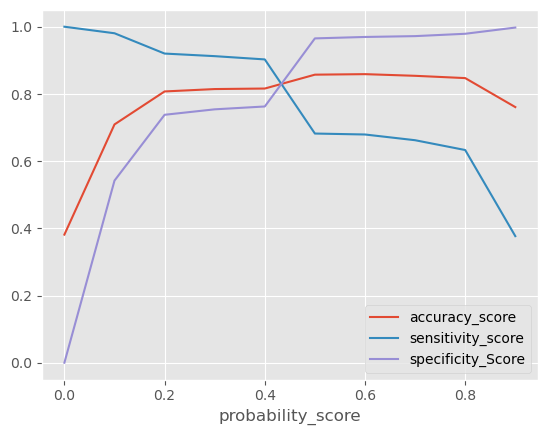

In [79]:
df.plot.line(x='probability_score', y=['accuracy_score', 'sensitivity_score', 'specificity_Score'])
plt.show()

## Precision Recall Trade off

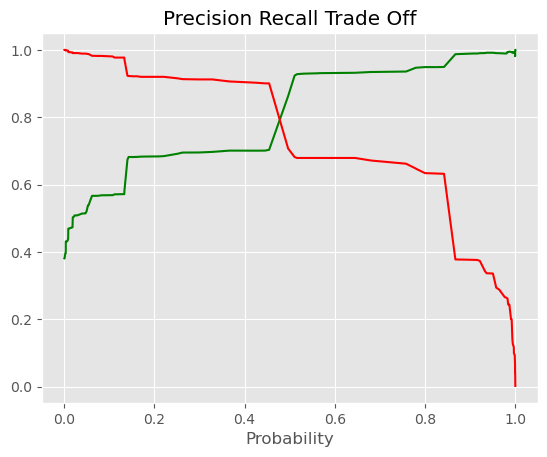

In [80]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xlabel("Probability")
plt.title('Precision Recall Trade Off')
plt.show()

<span style="color:purple">**- In the plot for accuracy_score, sensitivity_score, specificity_Score, we got `0.42` as Optimal score.**</span>

<span style="color:purple">**- In Precision Recall curve we got `0.47` as Optimal cutoff.**</span>

<span style="color:purple">**- We will take `0.42` as the optimal cutoff point as the probability score to assign Lead Score in training data.**</span>


## Test model on Train data:

In [81]:
y_train_pred_final = y_train_pred_final.iloc[:, :3]
y_train_pred_final['Convert_Predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.42 else 0)

y_train_pred_final['Lead_Score'] = y_train_pred_final.Convert_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Convert,Convert_Prob,Pros_ID,Convert_Predicted,Lead_Score
1871,0,0.008837,1871,0,1
6795,0,0.454352,6795,1,45
3516,0,0.008837,3516,0,1
8105,0,0.053987,8105,0,5
3934,0,0.133469,3934,0,13


## Model Evaluation on training data

Confusion Matrix:
[[3052  950]
 [ 240 2226]]
Accuracy: 0.816017316017316
Sensitivity: 0.902676399026764
Specificity: 0.7626186906546727
False Positive Rate: 0.23738130934532733
Precision: 0.7008816120906801


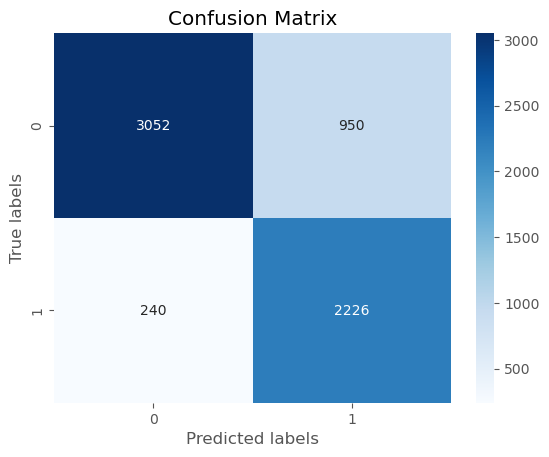

(0.816017316017316, 0.902676399026764, 0.7626186906546727, 0.7008816120906801)

In [82]:
model_evaluator_cm_graph(y_train_pred_final.Convert, y_train_pred_final.Convert_Predicted, print_score=True)

## Let's make the Final Model

In [83]:
# Build a logistic regression model and return predicted values on training dataset
# given with probability cutoff!

def model_cutoff(X_train, y_train, X_test, y_test, cutoff=0.5):
    # Train the model
    X_train_sm = sm.add_constant(X_train)
    logm = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
    res = logm.fit()
    
    y_train_pred = res.predict(X_train_sm).values.reshape(-1)
    
    y_train_pred_final = pd.DataFrame({'Prospect ID': y_train.index, 'Converted': y_train.values, 'Convert_Probability': y_train_pred})
    y_train_pred_final['Convert_predicted']= y_train_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_train_pred_final['Lead Score']= y_train_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print('_'*10,'Training Data Results','_'*10)
    print(y_train_pred_final.head())
    
    # Predict Lead Score on the Test Data
    X_test_sm = sm.add_constant(X_test)
    y_test_pred = res.predict(X_test_sm)
    
    y_test_pred_final = pd.DataFrame({'Prospect ID': y_test.index, 'Converted': y_test.values, 'Convert_Probability': y_test_pred})
    y_test_pred_final['Convert_predicted']= y_test_pred_final.Convert_Probability.map(lambda x: 1 if x > cutoff else 0)
    y_test_pred_final['Lead Score']= y_test_pred_final.Convert_Probability.map(lambda x: round(x*100))
    print('_'*15,'Test Data Results','_'*15)
    print(y_test_pred_final.head())
    
    
    # Printing Model Evalation Metics
    print('_'*15, 'Model Evaluation Metrics','_'*15)
    
    model_evaluator(y_test_pred_final.Converted, y_test_pred_final.Convert_predicted, print_score = True)
    
    return y_test_pred_final
    
    
    
    
    
    
    

In [84]:
model_cutoff(X_train[col_rfe], y_train, X_test[col_rfe], y_test, cutoff = 0.42)

__________ Training Data Results __________
   Prospect ID  Converted  Convert_Probability  Convert_predicted  Lead Score
0         1871          0             0.008837                  0           1
1         6795          0             0.454352                  1          45
2         3516          0             0.008837                  0           1
3         8105          0             0.053987                  0           5
4         3934          0             0.133469                  0          13
_______________ Test Data Results _______________
      Prospect ID  Converted  Convert_Probability  Convert_predicted  \
4269         4269          1             0.842016                  1   
2376         2376          1             0.986852                  1   
7766         7766          1             0.950406                  1   
9199         9199          0             0.003472                  0   
4359         4359          1             0.921422                  1   

     

,Prospect ID,Converted,Convert_Probability,Convert_predicted,Lead Score
4269,4269,1,0.842016,1,84
2376,2376,1,0.986852,1,99
7766,7766,1,0.950406,1,95
9199,9199,0,0.003472,0,0
4359,4359,1,0.921422,1,92
...,...,...,...,...,...
8649,8649,0,0.454352,1,45
2152,2152,1,0.986852,1,99
7101,7101,0,0.018488,0,2
5331,5331,0,0.049861,0,5


### Feature importance

In [85]:
print('List of Features used in the Final Model:')
print('')
for i in col_rfe.tolist():
    print(i)
print()
print('_'*15, 'Feature Importance', '_'*15)
print(res.params)

List of Features used in the Final Model:

Do Not Email
Lead Origin_Lead Add Form
Last Activity_SMS Sent
What is your current occupation_Working Professional
Tags_Busy
Tags_Closed by Horizzon
Tags_Lost to EINS
Tags_Other_Tags
Tags_Ringing
Tags_Will revert after reading the email
Tags_switched off
Last Notable Activity_Had a Phone Conversation
Last Notable Activity_Modified
Last Notable Activity_Olark Chat Conversation

_______________ Feature Importance _______________
const                                                  -3.971986
Do Not Email                                           -1.076735
Lead Origin_Lead Add Form                               2.644923
Last Activity_SMS Sent                                  1.856410
What is your current occupation_Working Professional    3.136114
Tags_Busy                                               3.256475
Tags_Closed by Horizzon                                 9.698965
Tags_Lost to EINS                                       9.015322
Tags_O

### Conclusion:
The logistic regression model employed in this study serves to estimate the likelihood of the target variable's outcome, rather than directly determining the outcome itself. By applying a probability threshold, the model predicts whether a lead is likely to convert into a customer.

In this project, logistic regression was utilized to gauge the probability of customer conversion. An optimal cutoff value of 0.42 was identified, where leads with a conversion probability exceeding 0.42 are classified as Hot Leads (likely to convert), while those below are labeled as Cold Leads (unlikely to convert).

The final Logistic Regression Model incorporates 14 features, the attributes in the final model encompass `[Do Not Email, Lead Origin_Lead Add Form, Last Activity_SMS Sent, What is your current occupation_Working Professional, Tags_Busy, Tags_Closed by Horizzon, Tags_Lost to EINS, Tags_Other_Tags, Tags_Ringing, Tags_Will revert after reading the email, Tags_switched off, Last Notable Activity_Had a Phone Conversation, Last Notable Activity_Modified, Last Notable Activity_Olark Chat Conversation]` exhibit significant coefficient factors, indicating their importance in predicting lead conversion.

The model demonstrates a Sensitivity of 0.928, suggesting its capability to correctly identify 91% of converted customers from the total pool. Additionally, it boasts a Precision of 0.70, ensuring that 70% of predicted hot leads indeed turn out to be True Hot Leads.

Furthermore, a reusable code block has been developed to predict Convert value and Lead Score, offering flexibility in adjusting cutoff values based on specific use-case requirements, such as prioritizing sensitivity or precision.